# GRIP: The Sparks Foundation

## Name: Badavath Tharun


## _Data Science and Business Analytics Intern_

### Task 1 : Prediction Using Supervised ML

1: Predict the percentage of an student based on the no. of study hours.

2: What will be predicted score if a student studies for 9.25 hrs/ day?

● Data can be found at http://bit.ly/w-data


This is a simple linear regression task as it involves just 2 variables.

## Step 1: Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Step 2: Data Visualizations

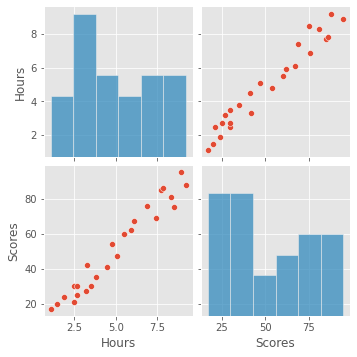

In [6]:
sns.pairplot(df)

<AxesSubplot:xlabel='Scores'>

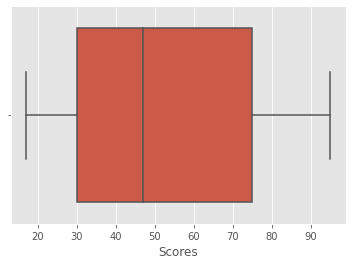

In [7]:
sns.boxplot(data=df,x ="Scores")

<AxesSubplot:xlabel='Hours'>

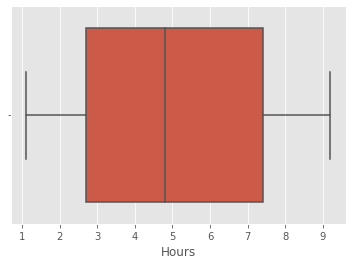

In [8]:
sns.boxplot(data=df,x ="Hours")

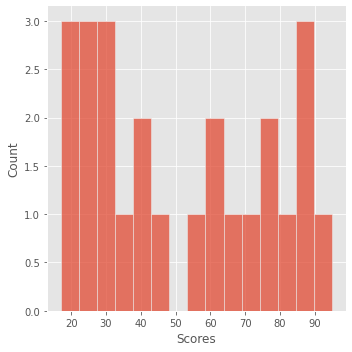

In [9]:
sns.displot(data=df, x="Scores", bins=15)

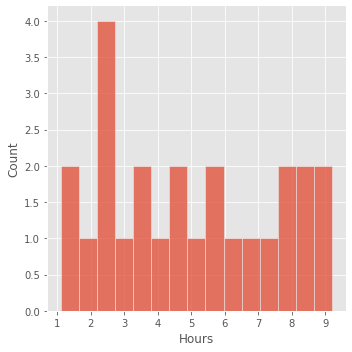

In [10]:
sns.displot(data=df, x='Hours',bins=15)

<AxesSubplot:>

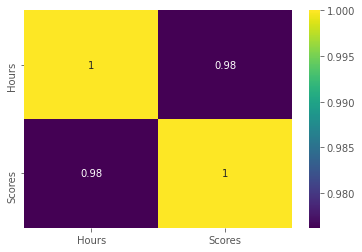

In [11]:
sns.heatmap(df.corr(), cmap='viridis', annot=True)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

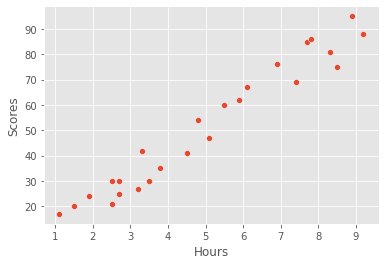

In [12]:
sns.scatterplot(data=df, x="Hours", y="Scores")

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

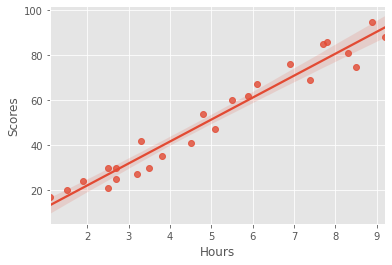

In [13]:
sns.regplot(data=df, x="Hours", y="Scores")

We can use np.polyfit for simple regression instead of using sklearn, use help(np.polyfit) for more


Basically this method accepts x,y and degreee of model trying to fit and returns the coefficients (highest order first)

## Step 3: Prepare the data for model

In [14]:
x = df['Hours']
y = df['Scores']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [16]:
#help(np.polyfit)

## Step 4: Training the model

In [17]:
coefs = np.polyfit(x_train,y_train,1)
coefs

array([9.96539205, 1.53900979])

In [18]:
def linear_model(future_hours):
    return coefs[0]* future_hours + coefs[1]

In [19]:
future_hours = np.linspace(0,10,100)
future_scores = linear_model(future_hours)

 This is our Predicted Linear Regression Model

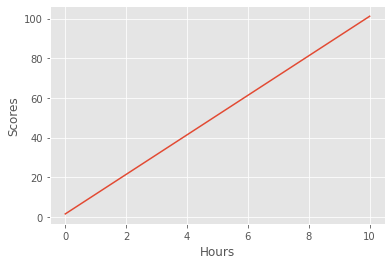

In [20]:
plt.plot(future_hours,future_scores)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

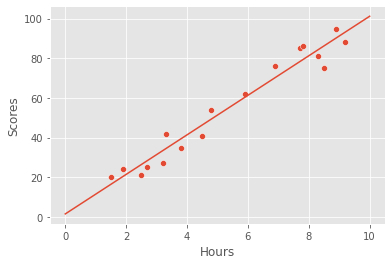

In [21]:
plt.plot(future_hours,future_scores)
sns.scatterplot(x=x_train, y=y_train)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Step 5: Model Evaluation | Performance Metrics

In [22]:
predictions = x_test.apply(linear_model)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
mae = mean_absolute_error(y_test, predictions)
mae

4.498466939896328

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmse

4.741097545662256

## Step 6: Retrain the model on whole data

In [26]:
final_coefs = np.polyfit(x,y,1)

In [27]:
print(final_coefs)

[9.77580339 2.48367341]


In [28]:
def final_linear_model(future_hours):
    return final_coefs[0]* future_hours + final_coefs[1]

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [29]:
predicted_score = final_linear_model(9.25)
predicted_score

92.9098547701573

# We can do the same task using scikit-learn too

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lm = LinearRegression()

In [32]:
x = df['Hours'].values.reshape(-1,1)
y = df['Scores']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [34]:
lm.fit(x_train, y_train)

LinearRegression()

In [35]:
lm.coef_

array([10.14486793])

In [36]:
lm.intercept_

1.2381409377570591

In [37]:
predicted_scores = lm.predict(x_test)

In [38]:
predicted_scores

array([57.03491454, 26.60031076, 46.89004661, 87.46951833, 36.74517869,
       85.44054474, 91.5274655 , 12.39749566])

In [39]:
mae = mean_absolute_error(y_test, predicted_scores)
mae

5.498137738780735

In [40]:
rmse = mean_squared_error(y_test, predicted_scores)**0.5
rmse

6.214786503584502

### Retrain on the whole data

In [41]:
lm.fit(x,y)

LinearRegression()

In [42]:
hours = [9.25]
predicted_score = lm.predict([hours])
print(predicted_score)

[92.90985477]
